In [ ]:
from ptracking.database.database import cursor

with cursor() as curr:
    curr.execute("SELECT created_at, signatures FROM petition WHERE state = 'closed' ORDER BY created_at ASC")
    res = curr.fetchall()


In [ ]:
import matplotlib.pyplot as plt

dates = []
signatures = []
for date, count in res:
    dates.append(date)
    signatures.append(count)
plt.plot(dates, signatures)

In [15]:
import datetime

window = 30
start_date = datetime.datetime(2011, 7, 29, 16, 16, 17)
end_date = datetime.datetime(2021, 5, 29, 12, 36, 42)
total_days = (end_date - start_date).days
date_ranges = []
for i in range(total_days // window):
    date_ranges.append((start_date + datetime.timedelta(i * window), start_date + datetime.timedelta((i+1)* window)))
print(date_ranges[:5])

119
[(datetime.datetime(2011, 7, 29, 16, 16, 17), datetime.datetime(2011, 8, 28, 16, 16, 17)), (datetime.datetime(2011, 8, 28, 16, 16, 17), datetime.datetime(2011, 9, 27, 16, 16, 17)), (datetime.datetime(2011, 9, 27, 16, 16, 17), datetime.datetime(2011, 10, 27, 16, 16, 17)), (datetime.datetime(2011, 10, 27, 16, 16, 17), datetime.datetime(2011, 11, 26, 16, 16, 17)), (datetime.datetime(2011, 11, 26, 16, 16, 17), datetime.datetime(2011, 12, 26, 16, 16, 17))]


[8, 0, 2, 3, 1, 0, 3, 1, 1, 2, 0, 1, 1, 1, 0, 3, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 4, 5, 2, 1, 4, 1, 1, 3, 6, 0, 4, 2, 1, 0, 2, 4, 4, 1, 0, 4, 1, 0, 0, 0, 0, 0, 334, 380, 297, 250, 244, 358, 317, 292, 280, 279, 277, 301, 240, 277, 320, 261, 237, 336, 323, 614, 371, 280, 250, 307, 243, 275, 118, 0, 0, 0, 367, 654, 300, 315, 348, 333, 314, 384, 447, 325, 431, 489, 383, 364, 283]
13898


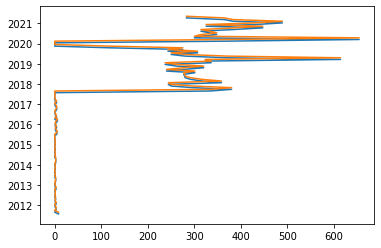

In [27]:
counts = []
with cursor() as curr:
    for bin in date_ranges:
        curr.execute("SELECT count(*) FROM petition WHERE created_at >= %s AND created_at < %s AND state = 'closed'", bin)
        c = curr.fetchone()
        counts.append(c[0] if c else 0)

print(counts)
print(sum(counts))

In [31]:
plt.bar(range(len(counts)), counts)

TypeError: 'tuple' object is not callable